In [6]:
import torch  
from torch import nn
import sys
sys.path.append('../') 
import utils as d2l

# 1.读取机器翻译数据集
- 返回的是一个迭代器、源数据的词表、目标数据的词表
- 迭代器返回的是 每个batch的X的索引，X的有效长度（除去结尾的结束符），Y的索引，Y的有效长度
- 有效长度的形状是一个向量，长度是batch_size,对应着当前batch中每个样本的有效长度“

In [7]:
train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size=4, num_steps=8)  
for X, X_valid_len, Y, Y_valid_len in train_iter:  
    print('X:', X.type(torch.int32))  
    print('X的有效长度:', X_valid_len)  
    print('Y:', Y.type(torch.int32))  
    print('Y的有效长度:', Y_valid_len)  
    break

X: tensor([[  9,  28,   5,   3,   1,   1,   1,   1],
        [ 45,  96,   4,   3,   1,   1,   1,   1],
        [  0,   8,  72,   4,   3,   1,   1,   1],
        [  7, 104,   4,   3,   1,   1,   1,   1]], dtype=torch.int32)
X的有效长度: tensor([4, 4, 5, 4])
Y: tensor([[59,  5,  3,  1,  1,  1,  1,  1],
        [18,  0, 28,  4,  3,  1,  1,  1],
        [ 0, 55,  4,  3,  1,  1,  1,  1],
        [ 6, 33, 17,  4,  3,  1,  1,  1]], dtype=torch.int32)
Y的有效长度: tensor([3, 5, 4, 5])


# 2.Encoder

In [8]:
class Encoder(nn.Module):  
    """编码器-解码器架构的基本编码器接口"""  
    def __init__(self, **kwargs):  
      super(Encoder, self).__init__(**kwargs)  
    def forward(self, X, *args):  
       raise NotImplementedError

# 2.Decoder

In [10]:
class Decoder(nn.Module):  
    """编码器-解码器架构的基本解码器接口"""  
    def __init__(self, **kwargs): 
        super(Decoder, self).__init__(**kwargs)  
    # init_state函数：用于将编码器的输出(enc_outputs)转换为编码后的状态。
    def init_state(self, enc_outputs, *args):  
        raise NotImplementedError  
    def forward(self, X, state):  
        raise NotImplementedError

# 3.Encoder-Decoder

In [11]:
class EncoderDecoder(nn.Module): 
    """编码器-解码器架构的基类"""  
    def __init__(self, encoder, decoder, **kwargs):  
        super(EncoderDecoder, self).__init__(**kwargs)  
        self.encoder = encoder  
        self.decoder = decoder  
    def forward(self, enc_X, dec_X, *args):  
        enc_outputs = self.encoder(enc_X, *args)  
        dec_state = self.decoder.init_state(enc_outputs, *args)  
        return self.decoder(dec_X, dec_state)

## 说明：在前向传播中,编码器的输出用于生成编码状态,这个状态又被解码器作为其输入的一部分。
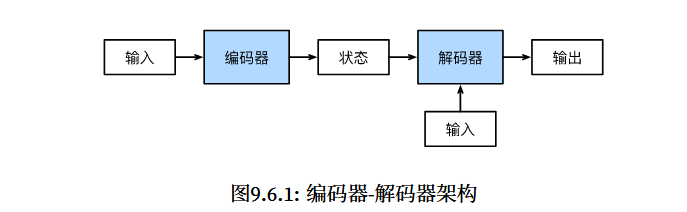